# Data Manipulation with Pandas

* Introducing Pandas Objects
* Data Indexing and Selection
* Operating on Data in Pandas
* Handling Missing Data
* Hierarchical Indexing
* Combining Datasets: Concat and Append
* Combining Datasets: Merge and Join
* Aggregation and Grouping
* Pivot Tables
* Vectorized String Operations
* Working with Time Series
* High-Performance Pandas: eval( ) and query( )

## Pandas

Pandas website: https://pandas.pydata.org/

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame

NumPy's ndarray data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. 

While it serves this purpose very well, its limitations become clear when we need more flexibility and when attempting operations that do not map well to element-wise broadcasting, each of which is an important piece of analyzing the less structured data.

DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.

Once Pandas is installed, you can import it and check the version

In [1]:
import pandas
pandas.__version__

'1.0.1'

Just as we generally import NumPy under the alias np, we will import Pandas under the alias pd

In [2]:
import pandas as pd

## Introducing Pandas Objects

Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.

Let's introduce these three fundamental Pandas data structures: 
* Series
* DataFrame
* Index

In [3]:
import numpy as np
import pandas as pd

### The Pandas Series Object

A Pandas Series is a one-dimensional array of indexed data.

It can be created from a list or array

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

The Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes.

The values are simply a familiar NumPy array

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The index is an array-like object of type pd.Index

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

The Pandas Series is much more general and flexible than the one-dimensional NumPy array that it emulates.

#### Series as generalized NumPy array

The essential difference is the presence of the index: 
* The Numpy Array has an implicitly defined integer index used to access the values
* The Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [12]:
data[5]

0.5

#### Series as specialized dictionary

A dictionary is a structure that maps arbitrary keys to a set of arbitrary values

A Series is a structure which maps typed keys to a set of typed values.

This typing is important: the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary

In [13]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Unlike a dictionary, though, the Series also supports array-style operations such as slicing

In [14]:
population['California']

38332521

In [15]:
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

#### Constructing Series objects

where index is an optional argument, and data can be one of many entities

Data can be a list or NumPy array, in which case index defaults to an integer sequence

In [16]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Data can be a scalar, which is repeated to fill the specified index

In [17]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

Data can be a dictionary, in which index defaults to the original dictionary keys

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred

In [19]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the Series is populated only with the explicitly identified keys.

### The Pandas DataFrame Object

The DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary

#### DataFrame as a generalized NumPy array

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.

Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new Series listing the area of each of the five states

In [20]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the population Series from before

We can use a dictionary to construct a single two-dimensional object containing this information

In [21]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the Series object, the DataFrame has an index attribute that gives access to the index labels

In [22]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the DataFrame has a columns attribute, which is an Index object holding the column label

In [23]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

#### DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data.

In [24]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: 
* in a two-dimesnional NumPy array, data[0] will return the first row. 
* For a DataFrame, data['col0'] will return the first column. 

Because of this, it is probably better to think about DataFrames as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful. 

#### Constructing DataFrame objects

A Pandas DataFrame can be constructed in a variety of ways. 

##### From a single Series object

A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series

In [25]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


##### From a list of dicts

Any list of dictionaries can be made into a DataFrame

In [26]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e., "not a number") values

In [27]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


##### From a dictionary of Series objects

A DataFrame can be constructed from a dictionary of Series objects

In [28]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


##### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each

In [29]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.721492,0.351659
b,0.105575,0.327342
c,0.847438,0.909953


##### From a NumPy structured array

A Pandas DataFrame operates much like a structured array, and can be created directly from one

In [30]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [31]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object

We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. 

This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multi-set, as Index objects may contain repeated values). 

In [32]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### Index as immutable array

The Index in many ways operates like an array. For example, we can use standard Python indexing notation to retrieve values or slices

In [33]:
ind[1]

3

In [34]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

Index objects also have many of the attributes familiar from NumPy arrays

In [35]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between Index objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means

In [36]:
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple DataFrames and arrays, without the potential for side effects from inadvertent index modification.

#### Index as ordered set

The Index object follows many of the conventions used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way

In [37]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [38]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [39]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [40]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

We have looked in detail at methods and tools to access, set, and modify values in NumPy arrays. These included:
* indexing (e.g., arr[2, 1])
* slicing (e.g., arr[:, 1:5])
* masking (e.g., arr[arr > 0])
* fancy indexing (e.g., arr[0, [1, 5]])
* combinations thereof (e.g., arr[:, [1, 5]])

Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. If you have used the NumPy patterns, the corresponding patterns in Pandas will feel very familiar, though there are a few quirks to be aware of

### Data Selection in Series

A Series object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary

#### Series as dictionary

In [41]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [42]:
data['b']

0.5

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values

In [43]:
'a' in data

True

In [44]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [45]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series objects can even be modified with a dictionary-like syntax. Just as you can extend a dictionary by assigning to a new key, you can extend a Series by assigning to a new index value

In [46]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as one-dimensional array

A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays

In [47]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [48]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [49]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [50]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Among these, slicing may be the source of the most confusion. 
* slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice
* slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice

#### Indexers: loc, iloc

These slicing and indexing conventions can be a source of confusion. 

if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.

In [51]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [52]:
# explicit index when indexing
data[1]

'a'

In [53]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes.

These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series

The loc attribute allows indexing and slicing that always references the explicit index

In [54]:
data.loc[1]

'a'

In [55]:
data.loc[1:3]

1    a
3    b
dtype: object

The iloc attribute allows indexing and slicing that always references the implicit Python-style index

In [56]:
data.iloc[1]

'b'

In [57]:
data.iloc[1:3]

3    b
5    c
dtype: object

One guiding principle of Python code is that "explicit is better than implicit." The explicit nature of loc and iloc make them very useful in maintaining clean and readable code

A third indexing attribute, ix, is a hybrid of the two, and for Series objects is equivalent to standard [ ]-based indexing. The purpose of the ix indexer will become more apparent in the context of DataFrame objects, which we will discuss in a moment.

### Data Selection in DataFrame

Recall that a DataFrame acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of Series structures sharing the same index. 

#### DataFrame as a dictionary

The first analogy we will consider is the DataFrame as a dictionary of related Series objects

In [58]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name

In [59]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings

In [60]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

This attribute-style column access actually accesses the exact same object as the dictionary-style access

In [61]:
data.area is data['area']

True

If the column names are not strings, or if the column names conflict with methods of the DataFrame, this attribute-style access is not possible. 

For example, the DataFrame has a pop( ) method, so data.pop will point to this rather than the "pop" column

In [62]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use data['pop'] = z rather than data.pop = z)

Like with the Series objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column

In [63]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### DataFrame as two-dimensional array

We can also view the DataFrame as an enhanced two-dimensional array

We can examine the raw underlying data array using the values attribute

In [64]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

With this picture in mind, many familiar array-like observations can be done on the DataFrame itself.

In [65]:
# transpose the full DataFrame to swap rows and columns
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of DataFrame objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array

In [66]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [67]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Using the iloc indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result

In [68]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Similarly, using the loc indexer we can index the underlying data in an array-like style but using the explicit index and column names

In [69]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the loc indexer we can combine masking and fancy indexing

In [70]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy

In [71]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Additional indexing conventions

While indexing refers to columns, slicing refers to rows

In [72]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index

In [73]:
data[3:5]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Similarly, direct masking operations are also interpreted row-wise rather than column-wise

In [74]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Operating on Data in Pandas

One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.).

Pandas inherits much of this functionality from NumPy, and the ufuncs are key to this

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output, and for binary operations such as addition and multiplication, Pandas will automatically align indices when passing the objects to the ufunc.

This means that keeping the context of data and combining data from different sources–both potentially error-prone tasks with raw NumPy arrays–become essentially foolproof ones with Pandas. 

### Ufuncs: Index Preservation

Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects

In [75]:
import pandas as pd
import numpy as np

In [76]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [77]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object with the indices preserved

In [78]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [79]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment

For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation.

#### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population:

In [80]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Let's see what happens when we divide these to compute the population density

In [81]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the union of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices

In [82]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with NaN, or "Not a Number," which is how Pandas marks missing data

In [83]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.

For example, calling A.add(B) is equivalent to calling A + B, but allows optional explicit specification of the fill value for any elements in A or B that might be missing.

In [84]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index alignment in DataFrame

A similar type of alignment takes place for both columns and indices when performing operations on DataFrames

In [85]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [86]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [87]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.

As was the case with Series, we can use the associated object's arithmetic method and pass any desired fill_value to be used in place of missing entries. 

In [88]:
# Here we'll fill with the mean of all values in A 
#(computed by first stacking the rows of A)
fill = A.stack().mean() # 4.5
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


The following table lists Python operators and their equivalent Pandas object methods

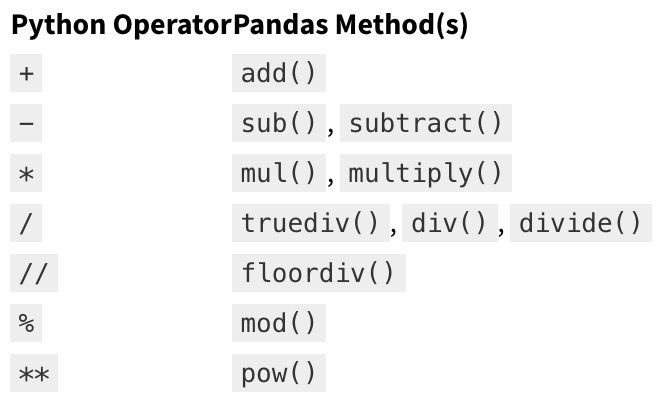

### Ufuncs: Operations Between DataFrame and Series

When performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. 

Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. 

In [89]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [90]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

According to NumPy's broadcasting rules, subtraction between a two-dimensional array and one of its rows is applied row-wise.

In Pandas, the convention similarly operates row-wise by default

In [91]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the axis keyword

In [92]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


Note that these DataFrame/Series operations, like the operations discussed above, will automatically align indices between the two elements

In [93]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [94]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [95]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays.

## Handling Missing Data

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous.

In particular, many interesting datasets will have some amount of data missing. 

### Trade-Offs in Missing Data Conventions

There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame. Generally, they revolve around one of two strategies: 
* using a mask that globally indicates missing values
* choosing a sentinel value that indicates a missing entry

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern.

None of these approaches is without trade-offs: 
* Use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. 
* A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

### Missing Data in Pandas

The way in which Pandas handles missing values is constrained by its reliance on the NumPy package, which does not have a built-in notion of NA values for non-floating-point data types.

NumPy does have support for masked arrays – that is, arrays that have a separate Boolean mask array attached for marking data as "good" or "bad." Pandas could have derived from this, but the overhead in both storage, computation, and code maintenance makes that an unattractive choice.

With these constraints in mind, Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point NaN value, and the Python None object.

#### None: Pythonic missing data

The first sentinel value used by Pandas is None, a Python singleton object that is often used for missing data in Python code. 

Because it is a Python object, None cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object'

In [96]:
import numpy as np
import pandas as pd

In [97]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This dtype=object means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.

While this kind of object array is useful for some purposes, any operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types

In [98]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
61.7 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.71 ms ± 68.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



The use of Python objects in an array also means that if you perform aggregations like sum( ) or min( ) across an array with a None value, you will generally get an error

In [99]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: Missing numerical data

The other missing data representation, NaN (acronym for Not a Number), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation

In [100]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code. 

You should be aware that NaN is a bit like a data virus–it infects any other object it touches. Regardless of the operation, the result of arithmetic with NaN will be another NaN

In [101]:
1 + np.nan

nan

In [102]:
0 *  np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful

In [103]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values

In [104]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that NaN is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

#### NaN and None in Pandas

NaN and None both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate

In [105]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present. 

For example, if we set a value in an integer array to np.nan, it will automatically be upcast to a floating-point type to accommodate the NA:

In [106]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [107]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the None to a NaN value.

The following table lists the upcasting conventions in Pandas when NA values are introduced

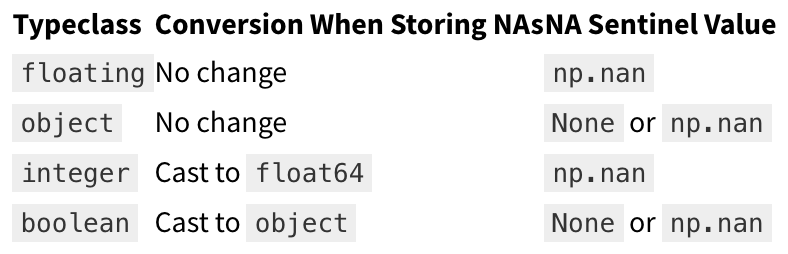

### Operating on Null Values

Pandas treats None and NaN as essentially interchangeable for indicating missing or null values.

To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:
* isnull( ): Generate a boolean mask indicating missing values
* notnull( ): Opposite of isnull()
* dropna( ): Return a filtered version of the data
* fillna( ): Return a copy of the data with missing values filled or imputed

#### Detecting null values

Pandas data structures have two useful methods for detecting null data: isnull( ) and notnull( ). Either one will return a Boolean mask over the data.

In [108]:
data = pd.Series([1, np.nan, 'hello', None])

In [109]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Boolean masks can be used directly as a Series or DataFrame index

In [110]:
data[data.notnull()]

0        1
2    hello
dtype: object

The isnull( ) and notnull( ) methods produce similar Boolean results for DataFrames

#### Dropping null values

In addition to the masking used before, there are the convenience methods, dropna( ) (which removes NA values) and fillna( ) (which fills in NA values).

In [111]:
data.dropna()

0        1
2    hello
dtype: object

In [112]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full columns. 

By default, dropna( ) will drop all rows in which any null value is present

In [113]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; axis=1 drops all columns containing a null value

In [114]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with all NA values, or a majority of NA values. This can be specified through the how or thresh parameters, which allow fine control of the number of nulls to allow through

The default is how='any', such that any row or column (depending on the axis keyword) containing a null value will be dropped. You can also specify how='all', which will only drop rows/columns that are all null values

In [115]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [116]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept

In [117]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values

Pandas provides the fillna( ) method, which returns a copy of the array with the null values replaced.

In [118]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero

In [119]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forwar

In [120]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward

In [121]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For DataFrames, the options are similar, but we can also specify an axis along which the fills take place

In [122]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [123]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

While Pandas does provide Panel and Panel4D objects that natively handle three-dimensional and four-dimensional data (see Aside: Panel Data), a far more common pattern in practice is to make use of hierarchical indexing (also known as multi-indexing) to incorporate multiple index levels within a single index. 

In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional Series and two-dimensional DataFrame objects.

We'll explore the direct creation of MultiIndex objects, considerations when indexing, slicing, and computing statistics across multiply indexed data, and useful routines for converting between simple and hierarchically indexed representations of your data.

### A Multiply Indexed Series

Let's start by considering how we might represent two-dimensional data within a one-dimensional Series.

In [124]:
import pandas as pd
import numpy as np

#### The bad way

Suppose you would like to track data about states from two different years. Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys

In [125]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index

In [126]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen

In [127]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

This produces the desired result, but is not as clean (or as efficient for large datasets) as the slicing syntax we've grown to love in Pandas.

#### The Better Way: Pandas MultiIndex

Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas MultiIndex type gives us the type of operations we wish to have. 

We can create a multi-index from the tuples as follows:

In [128]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

Notice that the MultiIndex contains multiple levels of indexing–in this case, the state names and the years, as well as multiple labels for each data point which encode these levels.

If we re-index our series with this MultiIndex, we see the hierarchical representation of the data

In [129]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Here the first two columns of the Series representation show the multiple index values, while the third column shows the data. 

Notice that some entries are missing in the first column: in this multi-index representation, any blank entry indicates the same value as the line above it.

Now to access all data for which the second index is 2010, we can simply use the Pandas slicing notation

In [130]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

#### MultiIndex as extra dimension

We could easily have stored the same data using a simple DataFrame with index and column labels

Pandas is built with this equivalence in mind. The unstack( ) method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame

In [131]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Naturally, the stack( ) method provides the opposite operation

In [132]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Just as we were able to use multi-indexing to represent two-dimensional data within a one-dimensional Series, we can also use it to represent data of three or more dimensions in a Series or DataFrame.

Each extra level in a multi-index represents an extra dimension of data; taking advantage of this property gives us much more flexibility in the types of data we can represent. 

Concretely, we might want to add another column of demographic data for each state at each year (say, population under 18) ; with a MultiIndex this is as easy as adding another column to the DataFrame

In [133]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

Here we compute the fraction of people under 18 by year, given the above data:

In [134]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


This allows us to easily and quickly manipulate and explore even high-dimensional data.

### Methods of MultiIndex Creation

The most straightforward way to construct a multiply indexed Series or DataFrame is to simply pass a list of two or more index arrays to the constructor

The work of creating the MultiIndex is done in the background.

In [135]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.341297  0.675288
  2  0.255107  0.615302
b 1  0.792743  0.035525
  2  0.645747  0.269238

Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will automatically recognize this and use a MultiIndex by default

In [136]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

#### Explicit MultiIndex constructors

For more flexibility in how the index is constructed, you can instead use the class method constructors available in the pd.MultiIndex

You can construct the MultiIndex from a simple list of arrays giving the index values within each level

In [137]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can construct it from a list of tuples giving the multiple index values of each point

In [138]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can even construct it from a Cartesian product of single indices

In [139]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Similarly, you can construct the MultiIndex directly using its internal encoding by passing levels (a list of lists containing available index values for each level) and codes (a list of lists that reference these labels)

In [140]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Any of these objects can be passed as the index argument when creating a Series or Dataframe, or be passed to the reindex method of an existing Series or DataFrame

#### MultiIndex level names

Sometimes it is convenient to name the levels of the MultiIndex

This can be accomplished by passing the names argument to any of the above MultiIndex constructors, or by setting the names attribute of the index after the fact

In [141]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### MultiIndex for columns

In a DataFrame, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well. 

Consider the following, which is a mock-up of some (somewhat realistic) medical data

In [142]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  37.3  29.0  37.5  52.0  37.8
     2      35.0  37.5  18.0  36.5  38.0  36.4
2014 1      38.0  36.7  36.0  37.6  41.0  34.8
     2      46.0  35.9  34.0  36.9  52.0  36.9

Here we see where the multi-indexing for both rows and columns can come in very handy. This is fundamentally four-dimensional data, where the dimensions are the subject, the measurement type, the year, and the visit number. 

With this in place we can, for example, index the top-level column by the person's name and get a full DataFrame containing just that person's information

In [143]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      29.0  37.5
     2      18.0  36.5
2014 1      36.0  37.6
     2      34.0  36.9

### Indexing and Slicing a MultiIndex

Indexing and slicing on a MultiIndex is designed to be intuitive, and it helps if you think about the indices as added dimensions.

#### Multiply indexed Series

In [144]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

We can access single elements by indexing with multiple terms

In [145]:
pop['California', 2000]

33871648

The MultiIndex also supports partial indexing, or indexing just one of the levels in the index.

The result is another Series, with the lower-level indices maintained

In [146]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

Partial slicing is available as well, as long as the MultiIndex is sorted

In [147]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice in the first index

In [148]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

Other types of indexing and selection work as well

Selection based on Boolean masks

In [149]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Selection based on fancy indexing also works

In [150]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames

A multiply indexed DataFrame behaves in a similar manner. 

In [151]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  37.3  29.0  37.5  52.0  37.8
     2      35.0  37.5  18.0  36.5  38.0  36.4
2014 1      38.0  36.7  36.0  37.6  41.0  34.8
     2      46.0  35.9  34.0  36.9  52.0  36.9

Remember that columns are primary in a DataFrame, and the syntax used for multiply indexed Series applies to the columns

We can recover Guido's heart rate data with a simple operation

In [152]:
health_data['Guido', 'HR']

year  visit
2013  1        29.0
      2        18.0
2014  1        36.0
      2        34.0
Name: (Guido, HR), dtype: float64

Also, as with the single-index case, we can use the loc, iloc, and ix indexers

In [153]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      44.0  37.3
     2      35.0  37.5

These indexers provide an array-like view of the underlying two-dimensional data, but each individual index in loc or iloc can be passed a tuple of multiple indices.

In [154]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        44.0
      2        35.0
2014  1        38.0
      2        46.0
Name: (Bob, HR), dtype: float64

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error

In [155]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-155-fb34fa30ac09>, line 1)

You could get around this by building the desired slice explicitly using Python's built-in slice( ) function, but a better way in this context is to use an IndexSlice object, which Pandas provides for precisely this situation. 

In [156]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,44.0,29.0,52.0
2014,1,38.0,36.0,41.0


### Rearranging Multi-Indices

There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purposes of various computations.

We saw a brief example of this in the stack( ) and unstack( ) methods, but there are many more ways to finely control the rearrangement of data between hierarchical indices and columns

#### Sorted and unsorted indices

Many of the MultiIndex slicing operations will fail if the index is not sorted.

In [157]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.800326
      2      0.400185
c     1      0.049580
      2      0.379657
b     1      0.659068
      2      0.621462
dtype: float64

In [158]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Although it is not entirely clear from the error message, this is the result of the MultiIndex not being sorted.

For various reasons, partial slices and other similar operations require the levels in the MultiIndex to be in sorted (i.e., lexographical) order. 

In [159]:
data = data.sort_index()
data

char  int
a     1      0.800326
      2      0.400185
b     1      0.659068
      2      0.621462
c     1      0.049580
      2      0.379657
dtype: float64

In [160]:
data['a':'b']

char  int
a     1      0.800326
      2      0.400185
b     1      0.659068
      2      0.621462
dtype: float64

#### Stacking and unstacking indices

It is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use

In [161]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [162]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [163]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


The opposite of unstack( ) is stack( ), which here can be used to recover the original series

In [164]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the reset_index method. 

Calling this on the population dictionary will result in a DataFrame with a state and year column holding the information that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation

In [165]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


It's useful to build a MultiIndex from the column values. This can be done with the set_index method of the DataFrame, which returns a multiply indexed DataFrame:

In [166]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices

We've previously seen that Pandas has built-in data aggregation methods, such as mean( ), sum( ), and max( ). For hierarchically indexed data, these can be passed a level parameter that controls which subset of the data the aggregate is computed on.

In [167]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  37.3  29.0  37.5  52.0  37.8
     2      35.0  37.5  18.0  36.5  38.0  36.4
2014 1      38.0  36.7  36.0  37.6  41.0  34.8
     2      46.0  35.9  34.0  36.9  52.0  36.9

Perhaps we'd like to average-out the measurements in the two visits each year. We can do this by naming the index level we'd like to explore, in this case the year

In [168]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     39.5  37.4  23.5  37.00  45.0  37.10
2014     42.0  36.3  35.0  37.25  46.5  35.85

By further making use of the axis keyword, we can take the mean among levels on the columns as well

Thus in two lines, we've been able to find the average heart rate and temperature measured among all subjects in all visits each year.

In [169]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,36.000000,37.166667
2014,41.166667,36.466667


### Aside: Panel Data

Pandas has a few other fundamental data structures that we have not yet discussed, namely the pd.Panel and pd.Panel4D objects. These can be thought of, respectively, as three-dimensional and four-dimensional generalizations of the (one-dimensional) Series and (two-dimensional) DataFrame structures. 

## Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources. These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets

In [170]:
import pandas as pd
import numpy as np

For convenience, we'll define this function which creates a DataFrame of a particular form that will be useful below

In [171]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In addition, we'll create a quick class that allows us to display multiple DataFrames side by side. The code makes use of the special _repr_html_ method, which IPython uses to implement its rich object display

In [172]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Recall: Concatenation of NumPy Arrays

Concatenation of Series and DataFrame objects is very similar to concatenation of Numpy arrays, which can be done via the np.concatenate function

In [173]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate. Additionally, it takes an axis keyword that allows you to specify the axis along which the result will be concatenated

In [174]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Simple Concatenation with pd.concat

Pandas has a function, pd.concat( ), which has a similar syntax to np.concatenate but contains a number of options that we'll discuss momentarily

pd.concat( ) can be used for a simple concatenation of Series or DataFrame objects, just as np.concatenate( ) can be used for simple concatenations of arrays

In [175]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as DataFrames

In [176]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the DataFrame (i.e., axis=0). Like np.concatenate, pd.concat allows specification of an axis along which concatenation will take place. 

In [177]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)") 

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

#### Duplicate indices

One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices, even if the result will have duplicate indices

In [178]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result. While this is valid within DataFrames, the outcome is often undesirable. pd.concat( ) gives us a few ways to handle it.

##### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of pd.concat( ) do not overlap, you can specify the verify_integrity flag. With this set to True, the concatenation will raise an exception if there are duplicate indices.

In [179]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


##### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored. This option can be specified using the ignore_index flag. With this set to true, the concatenation will create a new integer index for the resulting Series:

In [180]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


##### Adding MultiIndex keys

Another option is to use the keys option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data

In [181]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

#### Concatenation with joins

In practice, data from different sources might have different sets of column names, and pd.concat offers several options in this case.

In [182]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values.

To change this, we can specify one of several options for the join and join_axes parameters of the concatenate function.

By default, the join is a union of the input columns (join='outer'), but we can change this to an intersection of the columns using join='inner'

In [183]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

#### The append( ) method

Because direct array concatenation is so common, Series and DataFrame objects have an append method that can accomplish the same thing in fewer keystrokes.

In [185]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Keep in mind that unlike the append( ) and extend( ) methods of Python lists, the append( ) method in Pandas does not modify the original object–instead it creates a new object with the combined data.

It also is not a very efficient method, because it involves creation of a new index and data buffer. Thus, if you plan to do multiple append operations, it is generally better to build a list of DataFrames and pass them all at once to the concat() function.

## Combining Datasets: Merge and Join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.

If you have ever worked with databases, you should be familiar with this type of data interaction.

In [186]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Relational Algebra

The behavior implemented in pd.merge( ) is a subset of what is known as relational algebra, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.

### Categories of Joins

The pd.merge( ) function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins. All three types of joins are accessed via an identical call to the pd.merge( ) interface; the type of join performed depends on the form of the input data.

#### One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation

In [187]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single DataFrame, we can use the pd.merge( ) function

In [188]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The pd.merge( ) function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key. The result of the merge is a new DataFrame that combines the information from the two inputs.

Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between df1 and df2, and the pd.merge( ) function correctly accounts for this.

Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index

#### Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.

For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. 

In [189]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting DataFrame has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

#### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.

If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge. 

In [190]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


These three types of joins can be used with other Pandas tools to implement a wide array of functionality. But in practice, datasets are rarely as clean as the one we're working with here

### Specification of the Merge Key

However, often the column names will not match so nicely, and pd.merge( ) provides a variety of options for handling this.

#### The on keyword

Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names

In [191]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option works only if both the left and right DataFrames have the specified column name.

#### The left_on and right_on keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".

In [192]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the drop( ) method of DataFrames

In [193]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index. 

In [194]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


You can use the index as the key for merging by specifying the left_index and/or right_index flags in pd.merge( )

In [195]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


For convenience, DataFrames implement the join( ) method, which performs a merge that defaults to joining on indices

In [196]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


If you'd like to mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behavior

In [197]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.

### Specifying Set Arithmetic for Joins

In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.

In [198]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join. We can specify this explicitly using the how keyword, which defaults to "inner"

In [199]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the how keyword are 'outer', 'left', and 'right'

An outer join returns a join over the union of the input columns, and fills in all missing values with NAs

In [200]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

The left join and right join return joins over the left entries and right entries, respectively.

In [201]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using how='right' works in a similar manner.

In [202]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

### Overlapping Column Names: The suffixes Keyword

Finally, you may end up in a case where your two input DataFrames have conflicting column names. 

In [203]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix _x or _y to make the output columns unique.

If these defaults are inappropriate, it is possible to specify a custom suffix using the suffixes keyword

In [204]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.

### Example: US States Data

In [205]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

Let's take a look at the three datasets, using the Pandas read_csv( ) function

In [206]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Given this information, say we want to compute a relatively straightforward result: rank US states and territories by their 2010 population density.

We'll start with a many-to-one merge that will give us the full state name within the population DataFrame. We want to merge based on the state/region column of pop, and the abbreviation column of abbrevs. We'll use how='outer' to make sure no data is thrown away due to mismatched labels.

In [207]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls

In [208]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Some of the population info is null; let's figure out which these are!

In [209]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new state entries are also null, which means that there was no corresponding entry in the abbrevs key! 

In [210]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key. 

We can fix these quickly by filling in appropriate entries:

In [211]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

No more nulls in the state column: we're all set!

Now we can merge the result with the area data using a similar procedure. Examining our results, we will want to join on the state column in both:

In [212]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Again, let's check for nulls to see if there were any mismatches

In [213]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the area column; we can take a look to see which regions were ignored here

In [214]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our areas DataFrame does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion

In [215]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Now we have all the data we need. 

To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population. 

We'll use the query( ) function to do this quickly (this requires the numexpr package to be installed)

In [216]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


Now let's compute the population density and display it in order. We'll start by re-indexing our data on the state, and then compute the result

In [217]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [218]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile.

 We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

We can also check the end of the list

In [219]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

We see that the least dense state, by far, is Alaska, averaging slightly over one resident per square mile.

This type of messy data merging is a common task when trying to answer questions using real-world data sources.

## Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like sum( ), mean( ), median( ), min( ), and max( ), in which a single number gives insight into the nature of a potentially large dataset. 

For convenience, we'll use the same display magic function that we've seen in previous sections:

In [220]:
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Planets Data

Here we will use the Planets dataset, available via the Seaborn package 

It gives information on planets that astronomers have discovered around other stars

In [221]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [222]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

### Simple Aggregation in Pandas

As with a one-dimensional NumPy array, for a Pandas Series the aggregates return a single value

In [223]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [224]:
ser.sum()

2.811925491708157

In [225]:
ser.mean()

0.5623850983416314

For a DataFrame, by default the aggregates return results within each column

In [226]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [227]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

By specifying the axis argument, you can instead aggregate within each row

In [228]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas Series and DataFrames include all of the common aggregates; in addition, there is a convenience method describe( ) that computes several common aggregates for each column and returns the result. 

Let's use this on the Planets data, for now dropping rows with missing values

In [229]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This can be a useful way to begin understanding the overall properties of a dataset.

For example, we see in the year column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after. 

The following table summarizes some other built-in Pandas aggregations

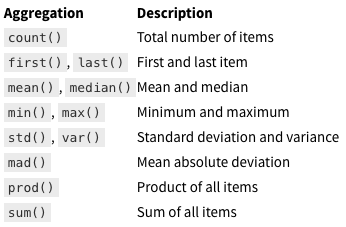

These are all methods of DataFrame and Series objects.

### GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation.

#### Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation

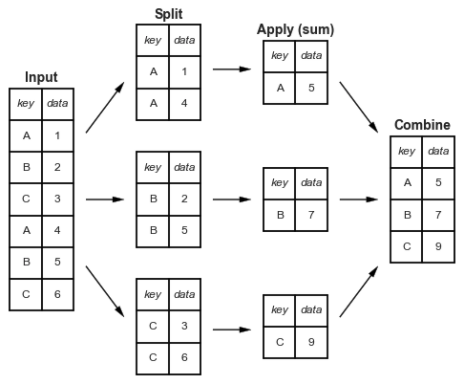

This makes clear what the groupby accomplishes:
* The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
* The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

The power of the GroupBy is that it abstracts away these steps: the user need not think about how the computation is done under the hood, but rather thinks about the operation as a whole.

In [230]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the groupby( ) method of DataFrames, passing the name of the desired key column

In [231]:
df.groupby('key')

Notice that what is returned is not a set of DataFrames, but a DataFrameGroupBy object. 

This object is where the magic is: you can think of it as a special view of the DataFrame, which is poised to dig into the groups but does no actual computation until the aggregation is applied.

To produce a result, we can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result

In [232]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### The GroupBy object

The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood.

##### Column indexing

The GroupBy object supports column indexing in the same way as the DataFrame, and returns a modified GroupBy object.

In [233]:
planets.groupby('method')

In [234]:
planets.groupby('method')['orbital_period']

Here we've selected a particular Series group from the original DataFrame group by reference to its column name.

As with the GroupBy object, no computation is done until we call some aggregate on the object

In [235]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

##### Iteration over groups

The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame

In [236]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in apply functionality, which we will discuss momentarily.

##### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the GroupBy object will be passed through and called on the groups, whether they are DataFrame or Series objects.

In [237]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.

The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods. Notice that they are applied to each individual group, and the results are then combined within GroupBy and returned.

Again, any valid DataFrame/Series method can be used on the corresponding GroupBy object, which allows for some very flexible and powerful operations!

#### Aggregate, filter, transform, apply

In particular, GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.

In [238]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregation

The aggregate( ) method can take a string, a function, or a list thereof, and compute all the aggregates at once. 

In [239]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column

In [240]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


##### Filtering

A filtering operation allows you to drop data based on the group properties.

In [241]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. 

Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

##### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.

 For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean

In [242]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


##### The apply( ) method

The apply( ) method lets you apply an arbitrary function to the group results. 

The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

Here is an apply() that normalizes the first column by the sum of the second

In [243]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


apply( ) within a GroupBy is quite flexible: the only criterion is that the function takes a DataFrame and returns a Pandas object or scalar; what you do in the middle is up to you!

#### Specifying the split key

##### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the DataFrame.

In [244]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

Of course, this means there's another, more verbose way of accomplishing the df.groupby('key') from before

In [245]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

##### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys

In [246]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


##### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group

In [247]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


##### A list of valid keys

Any of the preceding key choices can be combined to group on a multi-index

In [248]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade

In [249]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.

## Pivot Tables

A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. 

The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. 

That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

### Motivating Pivot Tables

We'll use the database of passengers on the Titanic, available through the Seaborn library

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [251]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof. 

In [252]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

Using the vocabulary of GroupBy, we might proceed using something like this: we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality.

In [253]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled.

This two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multi-dimensional aggregation.

### Pivot Table Syntax

In [254]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the groupby approach, and produces the same result.

As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes. First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!).

#### Multi-level pivot tables

Just as in the GroupBy, the grouping in pivot tables can be specified with multiple levels, and via a number of options.

In [255]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Let's add info on the fare paid using pd.qcut to automatically compute quantiles

In [256]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices.

#### Additional pivot table options

The full call signature of the pivot_table method of DataFrames is as follows:

The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. 

As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., 'sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (e.g., np.sum( ), min( ), sum( ), etc.). 

Additionally, it can be specified as a dictionary mapping a column to any of the above desired options

In [257]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the values keyword; when specifying a mapping for aggfunc, this is determined automatically.

At times it's useful to compute totals along each grouping. This can be done via the margins keyword.

In [258]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


The margin label can be specified with the margins_name keyword, which defaults to "All".

### Example: Birthrate Data

As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC).

In [259]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [260]:
births = pd.read_csv('data/births.csv')

In [261]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


We can start to understand this data a bit more by using a pivot table.

Let's add a decade column, and take a look at male and female births as a function of decade

In [262]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade.

To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year

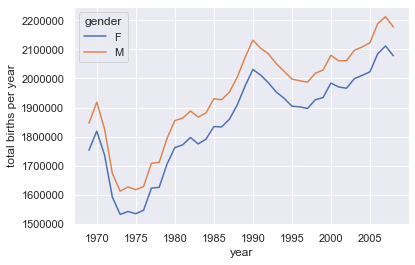

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

With a simple pivot table and plot( ) method, we can immediately see the annual trend in births by gender.

By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.

#### Further data exploration

Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point. 

We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation

In [264]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [265]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [266]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [267]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

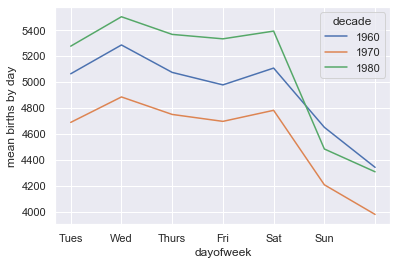

In [268]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the year. Let's first group the data by month and day separately

In [269]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [270]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

/Users/lunghaolee/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


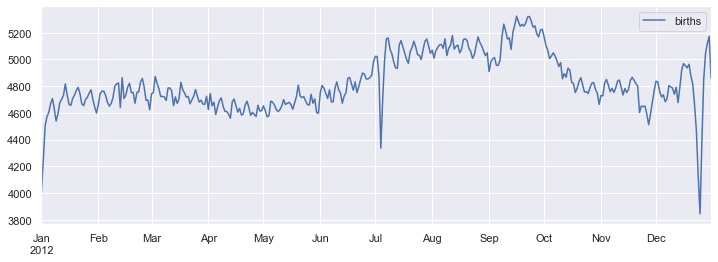

In [271]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## Vectorized String Operations

One strength of Python is its relative ease in handling and manipulating string data. Pandas builds on this and provides a comprehensive set of vectorized string operations that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data.

### Introducing Pandas String Operations

In [272]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This vectorization of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done. 

For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax

In [273]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

This is perhaps sufficient to work with some data, but it will break if there are any missing values. 

In [274]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the str attribute of Pandas Series and Index objects containing strings.

In [275]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values

In [276]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Using tab completion on this str attribute will list all the vectorized string methods available to Pandas.

### Tables of Pandas String Methods

If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods

In [277]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

#### Methods similar to Python string methods

Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. 

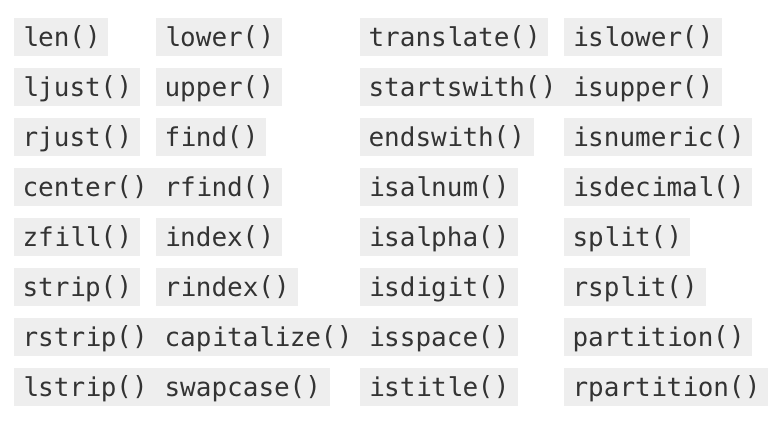

Notice that these have various return values. Some, like lower(), return a series of strings

In [278]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

But some others return numbers

In [279]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

Or Boolean values

In [280]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Still others return lists or other compound values for each element

In [281]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in re module

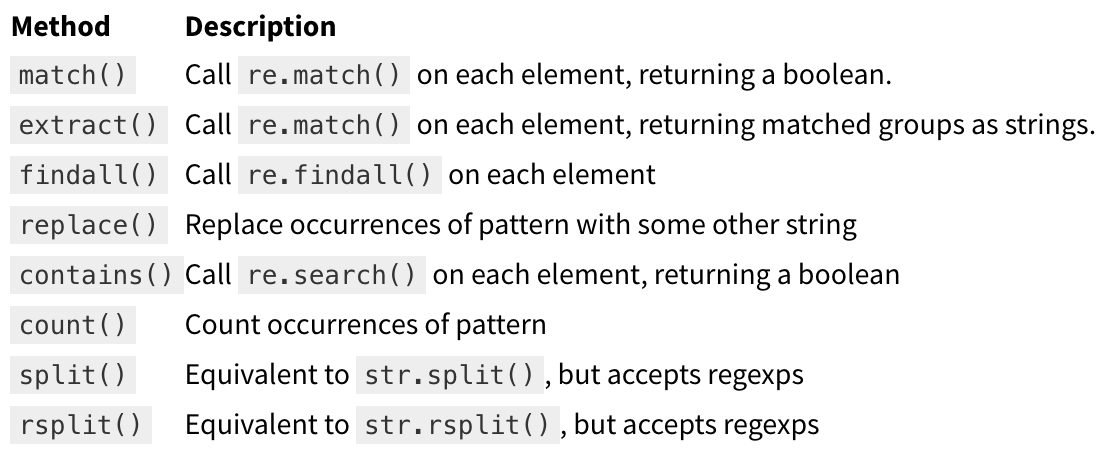

We can extract the first name from each by asking for a contiguous group of characters at the beginning of each element

In [282]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the start-of-string (^) and end-of-string ($) regular expression characters

In [283]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

The ability to concisely apply regular expressions across Series or Dataframe entries opens up many possibilities for analysis and cleaning of data.

#### Miscellaneous methods

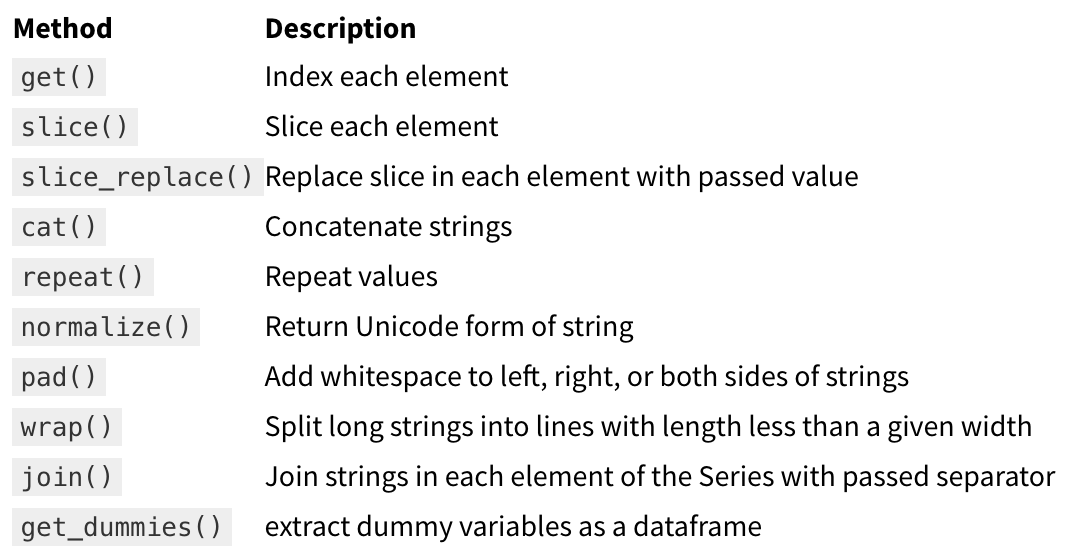

##### Vectorized item access and slicing

The get( ) and slice( ) operations, in particular, enable vectorized element access from each array.

In [284]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via df.str.get( i ) and df.str[ i ] is likewise similar.

These get( ) and slice( ) methods also let you access elements of arrays returned by split( ). 

In [285]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

##### Indicator variables

Another method that requires a bit of extra explanation is the get_dummies( ) method. This is useful when your data has a column containing some sort of coded indicator. 

In [286]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The get_dummies( ) routine lets you quickly split-out these indicator variables into a DataFrame

In [287]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. 

Date and time data comes in a few flavors, which we will discuss here:
* Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
* Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
* Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

### Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.

While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

#### Native Python dates and times: datetime and dateutil

Python's basic objects for working with dates and times reside in the built-in datetime module.

Along with the third-party dateutil module, you can use it to quickly perform a host of useful functionalities on dates and times.

In [288]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the dateutil module, you can parse dates from a variety of string formats

In [289]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week

In [290]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates ("%A"), which you can read about in the strftime section of Python's datetime documentation. Documentation of other useful date utilities can be found in dateutil's online documentation. 

The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.

#### Typed arrays of times: NumPy's datetime64

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. 

The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. 

In [291]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it

In [292]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

In [293]:
# Here is a day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [294]:
# Here is a minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code. 

In [295]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

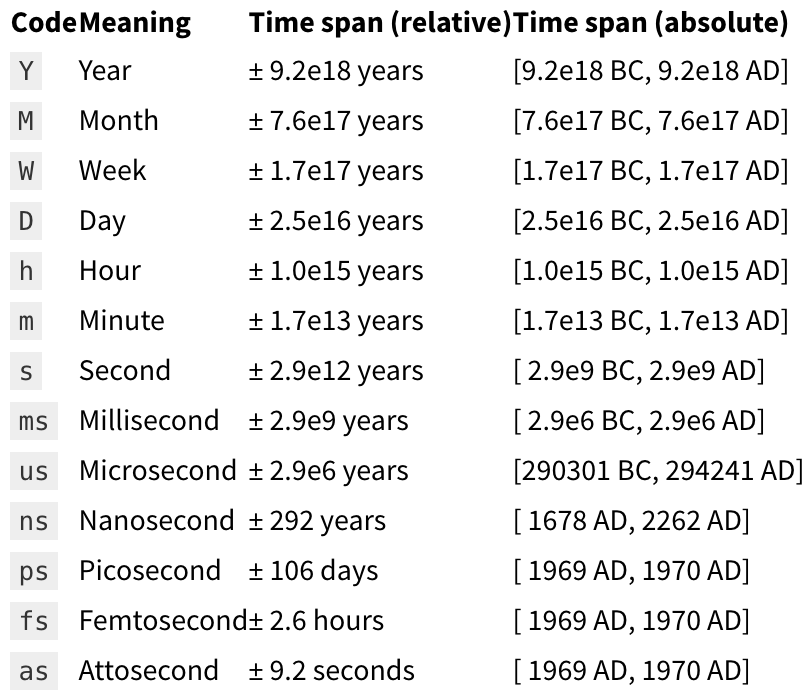

#### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64.

From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

In [296]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [297]:
date.strftime('%A')

'Saturday'

In [298]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to index data by timestamps

In [299]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [300]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year

In [301]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data
* For time stamps
    - Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.
* For time Periods
    - Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
* For time deltas or durations
    - Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. 

Passing a single date to pd.to_datetime( ) yields a Timestamp; passing a series of dates by default yields a DatetimeIndex.

In [302]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period( ) function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency

In [303]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A TimedeltaIndex is created, for example, when a date is subtracted from another

In [304]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: pd.date_range()

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: 
* pd.date_range( ) for timestamps
* pd.period_range( ) for periods
* pd.timedelta_range( ) for time deltas.

In [305]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods

In [306]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the freq argument, which defaults to D.

In [307]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of Period or Timedelta values, the very similar pd.period_range( ) and pd.timedelta_range( ) functions are useful.

In [308]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

And a sequence of durations increasing by an hour

In [309]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset. 

Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing.

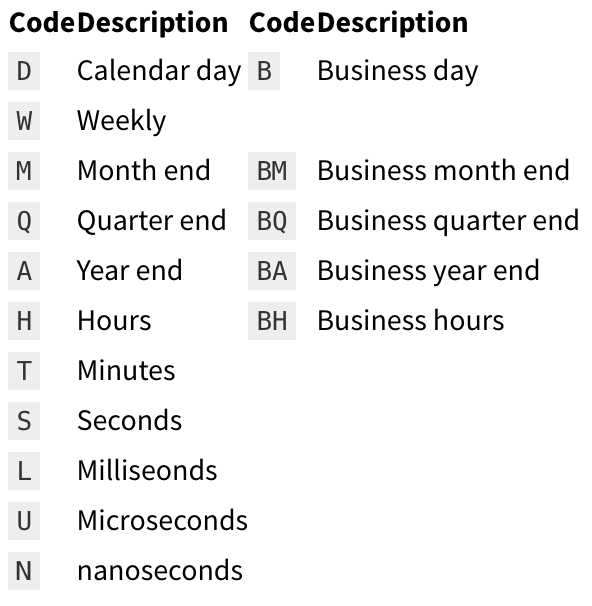

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning

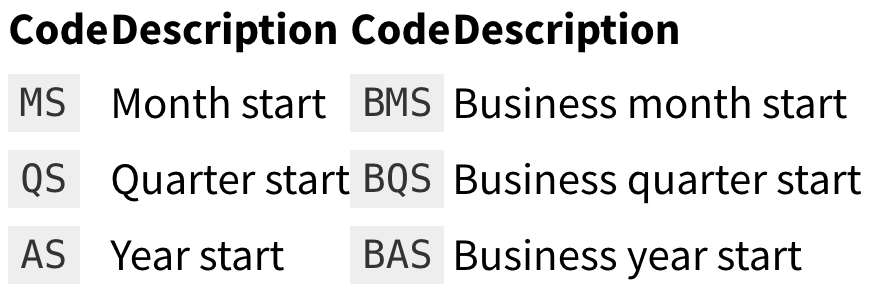

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:
* Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
* A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:
* W-SUN, W-MON, W-TUE, W-WED, etc.

On top of this, codes can be combined with numbers to specify other frequencies.

In [310]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module.

In [311]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## High-Performance Pandas: eval( ) and query( )

### Motivating query( ) and eval( ): Compound Expressions

We've seen previously that NumPy and Pandas support fast vectorized operations

In [312]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

1.6 ms ± 80.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


As discussed in Computation on NumPy Arrays: Universal Functions, this is much faster than doing the addition via a Python loop or comprehension:

In [313]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

366 ms ± 76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


But this abstraction can become less efficient when computing compound expressions. 

In [314]:
mask = (x > 0.5) & (y < 0.5)

Because NumPy evaluates each subexpression, this is roughly equivalent to the following:

In [315]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In other words, every intermediate step is explicitly allocated in memory. If the x and y arrays are very large, this can lead to significant memory and computational overhead. 

The Numexpr library gives you the ability to compute this type of compound expression element by element, without the need to allocate full intermediate arrays. 

In [316]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

The benefit here is that Numexpr evaluates the expression in a way that does not use full-sized temporary arrays, and thus can be much more efficient than NumPy, especially for large arrays.

The Pandas eval( ) and query( ) tools that we will discuss here are conceptually similar, and depend on the Numexpr package.

### pandas.eval( ) for Efficient Operations

The eval( ) function in Pandas uses string expressions to efficiently compute operations using DataFrames. 

In [317]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

To compute the sum of all four DataFrames using the typical Pandas approach, we can just write the sum

In [318]:
%timeit df1 + df2 + df3 + df4

59.3 ms ± 7.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The same result can be computed via pd.eval by constructing the expression as a string

In [319]:
%timeit pd.eval('df1 + df2 + df3 + df4')

30.2 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The eval( ) version of this expression is about 50% faster (and uses much less memory), while giving the same result:

In [320]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

#### Operations supported by pd.eval(  )

In [321]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

##### Arithmetic operators

In [322]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

##### Comparison operators

In [323]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

##### Bitwise operators

pd.eval( ) supports the & and | bitwise operators

In [324]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In addition, it supports the use of the literal and and or in Boolean expressions

In [325]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

##### Object attributes and indices

pd.eval( ) supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax

In [326]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

##### Other operations

Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently not implemented in pd.eval( ).

If you'd like to execute these more complicated types of expressions, you can use the Numexpr library itself.

### DataFrame.eval( ) for Column-Wise Operations

Just as Pandas has a top-level pd.eval( ) function, DataFrames have an eval( ) method that works in similar ways.

The benefit of the eval( ) method is that columns can be referred to by name. 

In [327]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [328]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

The DataFrame.eval( ) method allows much more succinct evaluation of expressions with the columns

In [329]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

Notice here that we treat column names as variables within the evaluated expression, and the result is what we would wish.

#### Assignment in DataFrame.eval( )

DataFrame.eval( ) also allows assignment to any column

In [330]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


We can use df.eval( ) to create a new column 'D' and assign to it a value computed from the other columns

In [331]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In the same way, any existing column can be modified

In [332]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


#### Local variables in DataFrame.eval( )

The DataFrame.eval( ) method supports an additional syntax that lets it work with local Python variables.

In [333]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

The @ character here marks a variable name rather than a column name, and lets you efficiently evaluate expressions involving the two "namespaces": the namespace of columns, and the namespace of Python objects.

Notice that this @ character is only supported by the DataFrame.eval( ) method, not by the pandas.eval( ) function, because the pandas.eval( ) function only has access to the one (Python) namespace.

### DataFrame.query( ) Method

The DataFrame has another method based on evaluated strings, called the query( ) method. 

In [334]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [335]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

Note that the query( ) method also accepts the @ flag to mark local variables

In [336]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

### Performance: When to Use These Functions

When considering whether to use these functions, there are two considerations: computation time and memory use.

Memory use is the most predictable aspect. As already mentioned, every compound expression involving NumPy arrays or Pandas DataFrames will result in implicit creation of temporary arrays

In [337]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

Is roughly equivalent to this:

In [338]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

If the size of the temporary DataFrames is significant compared to your available system memory (typically several gigabytes) then it's a good idea to use an eval( ) or query( ) expression

You can check the approximate size of your array in bytes using this:

In [339]:
df.values.nbytes

32000

On the performance side, eval( ) can be faster even when you are not maxing-out your system memory. The issue is how your temporary DataFrames compare to the size of the L1 or L2 CPU cache on your system (typically a few megabytes in 2016); if they are much bigger, then eval( ) can avoid some potentially slow movement of values between the different memory caches.